# Análisis Exploratorio

**Objetivo:** Explorar el dataset limpio y extraer conclusiones estadísticas básicas.

## Análisis exploratorio: Popularidad vs. Puntuación

En esta sección se carga el archivo limpio `popularidad_vs_puntuacion.csv` y se realiza un análisis exploratorio básico para responder a la pregunta:

**¿Qué relación existe entre la popularidad y la puntuación de un videojuego?**

Se realiza:
- Un resumen estadístico de las columnas `added` y `rating`.
- La visualización de casos extremos (más populares y mejor puntuados).
- El cálculo del coeficiente de correlación de Pearson entre `added` y `rating`, para cuantificar la relación entre ambas variables.

También se revisa la columna `metacritic` para observar posibles diferencias entre la percepción del público y la crítica especializada.


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo visual para los gráficos
sns.set_style("whitegrid")
sns.set_palette("deep")

In [ ]:
# Cargamos los datos de popularidad y puntuación filtrados
df = pd.read_csv("../data/processed/popularidad_vs_puntuacion.csv")
df.head()


,name,rating,ratings_count,added,released,metacritic,has_rating,has_added,has_metacritic,rating_clean,added_clean
0,The Witcher 3: Wild Hunt,4.65,6890,21657,2015-05-18,92.0,True,True,True,4.65,21657
1,Life is Strange,4.12,3706,15758,2015-01-29,83.0,True,True,True,4.12,15758
2,Fallout 4,3.81,3350,14079,2015-11-09,84.0,True,True,True,3.81,14079
3,Rocket League,3.93,2822,12766,2015-07-07,86.0,True,True,True,3.93,12766
4,Rise of the Tomb Raider,4.04,2740,12211,2015-11-10,86.0,True,True,True,4.04,12211


## Estadísticas descriptivas

A continuación se muestra un resumen estadístico de las variables limpias `added_clean`, `rating_clean` y `metacritic`.


In [ ]:
# Datos estadísticos de las columnas 'added_clean', 'rating_clean' y 'metacritic'
df[['added_clean', 'rating_clean', 'metacritic']].describe()

,added_clean,rating_clean,metacritic
count,2000.000000,2000.000000,1056.000000
mean,1953.333000,3.398905,76.918561
std,2181.359787,0.898383,8.416920
min,63.000000,0.000000,30.000000
25%,606.000000,3.090000,72.750000
50%,1313.500000,3.590000,78.000000
75%,2313.250000,3.980000,82.000000
max,21657.000000,4.860000,97.000000


## Casos extremos

Se muestran los videojuegos más populares y los mejor puntuados según las columnas tratadas.


In [ ]:
# Top 10 más Populares
df.sort_values(by='added_clean', ascending=False).head(10)[['name', 'added_clean', 'rating_clean']]

,name,added_clean,rating_clean
0,The Witcher 3: Wild Hunt,21657,4.65
600,Red Dead Redemption 2,16331,4.59
1,Life is Strange,15758,4.12
400,Destiny 2,14517,3.52
601,God of War (2018),14140,4.55
2,Fallout 4,14079,3.81
200,DOOM (2016),13860,4.38
1000,Cyberpunk 2077,13551,4.21
3,Rocket League,12766,3.93
401,Horizon Zero Dawn,12653,4.28


In [ ]:
# Top 10 mejor puntuados
df.sort_values(by='rating_clean', ascending=False).head(10)[['name', 'rating_clean', 'added_clean']]


,name,rating_clean,added_clean
1925,DRAGON BALL: Sparking! ZERO,4.86,108
377,The Witcher 3 Wild Hunt - Complete Edition,4.79,1405
1025,Persona 5 Royal,4.75,3073
1619,Cyberpunk 2077: Phantom Liberty,4.71,1027
1428,The Last of Us Part I,4.67,1655
1223,Disco Elysium: Final Cut,4.65,2076
0,The Witcher 3: Wild Hunt,4.65,21657
1852,Elden Ring: Shadow of the Erdtree,4.62,283
1604,Resident Evil 4,4.62,1981
1942,Beyond Good & Evil - 20th Anniversary Edition,4.60,99


## Correlación entre Popularidad y Puntuación

Se calcula la correlación de Pearson entre las variables `added_clean` y `rating_clean`.


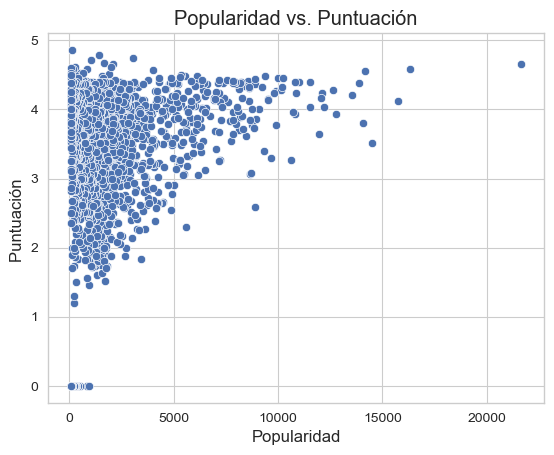

,added_clean,rating_clean
added_clean,1.000000,0.255836
rating_clean,0.255836,1.000000


In [15]:
# Visualización
sns.scatterplot(data=df, x='added_clean', y='rating_clean')
plt.title("Popularidad vs. Puntuación")
plt.xlabel("Popularidad")
plt.ylabel("Puntuación ")
plt.show()

# Correlación entre 'added_clean' y 'rating_clean'
df[['added_clean', 'rating_clean']].corr(method='pearson')

## Comparación con Metacritic

Se analiza la relación entre la puntuación de RAWG (`rating_clean`) y la puntuación de Metacritic.


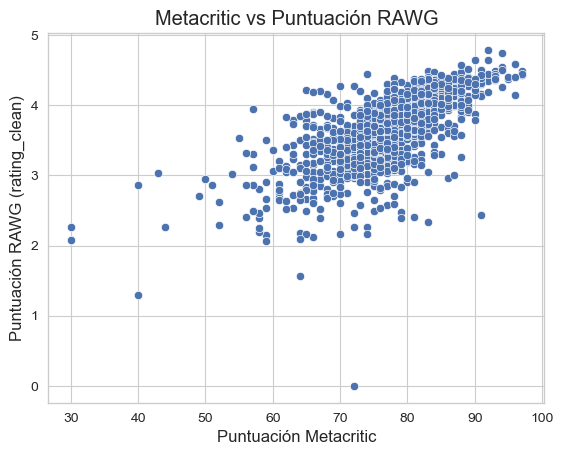

,rating_clean,metacritic
rating_clean,1.000000,0.681788
metacritic,0.681788,1.000000


In [16]:
# Visualización de la correlación entre rating_clean y metacritic
sns.scatterplot(data=df, x='metacritic', y='rating_clean')
plt.title("Metacritic vs Puntuación RAWG")
plt.xlabel("Puntuación Metacritic")
plt.ylabel("Puntuación RAWG (rating_clean)")
plt.show()

# Correlación adicional
df[['rating_clean', 'metacritic']].corr()

## Distribución de Puntuaciones

La distribución de puntuaciones `rating_clean` se concentra mayoritariamente entre 3 y 4 (teniendo en cuenta la distorción que han podido causar los NaN tratados), mostrando una tendencia a **evitar las valoraciones extremas**. Esta acumulación en el rango medio-alto puede reflejar una cierta **moderación en las valoraciones** por parte de los usuarios, o una predominancia de títulos de calidad aceptable en la base de datos.

Con la curva KDE vemos la forma de la distribución, que **se aproxima a una curva normal asimétrica hacia la izquierda**, con una cola que incluye juegos con valoraciones cercanas a 0.

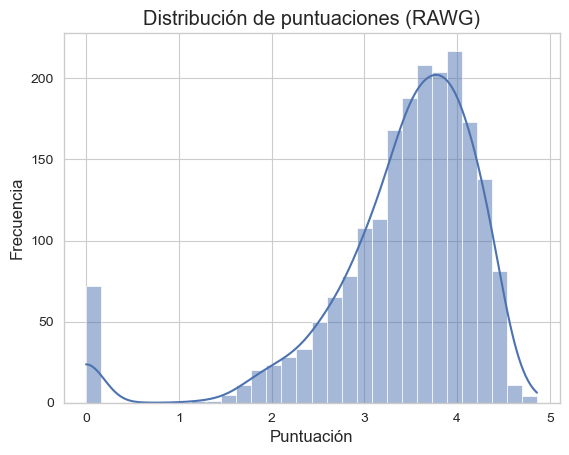

In [17]:

# Visualización de la distribución de puntuaciones
sns.histplot(df['rating_clean'], bins=30, kde=True)
plt.title("Distribución de puntuaciones (RAWG)")
plt.xlabel("Puntuación")
plt.ylabel("Frecuencia")
plt.show()


### Alta puntuación pero baja popularidad
Estos juegos tienen una puntuación excelente (`rating_clean` > 4.5) pero un número de añadidos (`added_clean`) muy bajo (menos de 100). Esto puede indicar **joyas ocultas** que han pasado desapercibidas para el gran público.


In [ ]:

# Juegos con buena puntuación pero baja popularidad
df.sort_values(by='rating_clean', ascending=False).query("added_clean < 100")[['name', 'rating_clean', 'added_clean']].head(3)


,name,rating_clean,added_clean
1942,Beyond Good & Evil - 20th Anniversary Edition,4.60,99
1966,Unicorn Overlord,4.53,84
1980,Felvidek,4.50,72


### Alta popularidad pero baja puntuación
Estos juegos han sido muy añadidos por los usuarios (`added_clean` > 2500) pero tienen puntuaciones bastante bajas (`rating_clean` < 2). En estos casos, la popularidad puede estar influida por la curiosidad, la polémica o el marketing, pero **la calidad percibida no cumple las expectativas**.

In [ ]:

# Juegos con mucha popularidad pero baja puntuación
df.sort_values(by='added_clean', ascending=False).query("rating_clean < 2")[['name', 'rating_clean', 'added_clean']].head(3)


,name,rating_clean,added_clean
640,Headsnatchers,1.83,3422
293,Pixel Puzzles Ultimate,1.99,2722
80,GameGuru,1.88,2676



## Conclusión Final

- **Popularidad y puntuación están débilmente correlacionadas** (r ≈ 0.25).
- **Crítica (Metacritic) y usuarios coinciden más** en la percepción de calidad.
- Hay casos extremos donde la **visibilidad no refleja la calidad** y viceversa.
- La mayoría de juegos están valorados entre **3 y 4**, con pocas valoraciones extremas.

> **Conclusión global**: Un videojuego exitoso necesita más que calidad: el contexto, la visibilidad y el marketing son piezas clave. La calidad es reconocida, pero no siempre descubierta por el gran público.
